In [98]:
%run "0. config.ipynb"

1887


In [192]:
def compile_coordinates(logs):
  df = logs.loc[:, ["playerId","type", "coordinates", "serverTime"]]
  
  def str_to_coordinates(s):
    s = s.replace("[", "")
    s = s.replace("]", "")
    s = s.replace(" ", "")
    
    [ x, y ]= s.split(",")
    
    return [ int(x), int(y) ]

  [x ,y ] = zip(*df["coordinates"].map(lambda x: str_to_coordinates(x)))
  
  df["x"] = x
  df["y"] = y

  df = df.drop("coordinates",1)
  
  df = df.set_index("playerId")
  
  return df

players_coordinates = compile_coordinates(df_raw)

players_coordinates.head(10)

,type,serverTime,x,y
playerId,,,,
9c183209-8867-46bb-9d29-9dda57e5a7bd,start,2016-02-04T20:12:38.789Z,-6,143
9c183209-8867-46bb-9d29-9dda57e5a7bd,selectmenu,2016-02-04T20:12:38.789Z,-6,143
ab2d0f9a-13ec-4bc0-b5cd-58942d906954,start,2016-02-04T20:18:08.038Z,-6,143
ab2d0f9a-13ec-4bc0-b5cd-58942d906954,selectmenu,2016-02-04T20:18:18.039Z,-6,143
ecfe1f90-19c7-4ab9-8d6f-bd8feb7ff472,start,2016-02-04T20:31:05.379Z,-6,143
ecfe1f90-19c7-4ab9-8d6f-bd8feb7ff472,selectmenu,2016-02-04T20:31:05.379Z,-6,143
5af5f837-2aa1-4d5e-86a3-05d39d6cf63d,start,2016-02-05T03:06:55.435Z,-6,143
3607b3ec-9e2a-4043-9f07-8dbccee66cb3,selectmenu,2016-02-05T03:07:00.500Z,-6,143
3607b3ec-9e2a-4043-9f07-8dbccee66cb3,reach,2016-02-05T03:07:45.445Z,2,134


# just plot it!

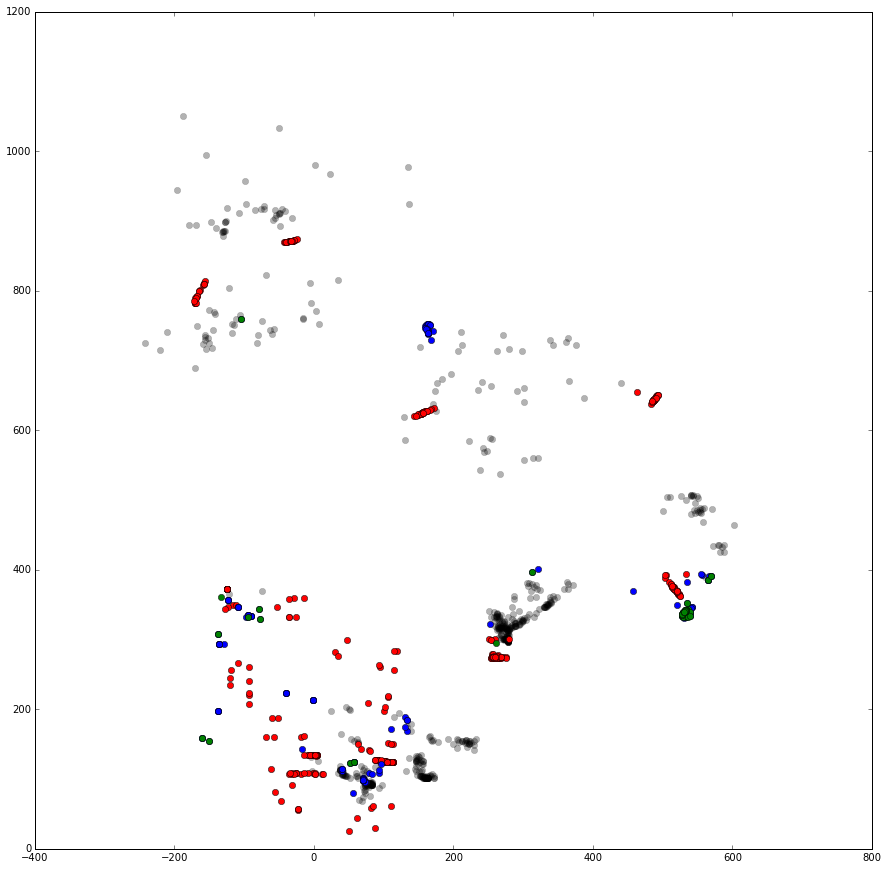

In [193]:
select = players_coordinates[players_coordinates["y"] < 1500 ]

plt.figure(figsize=(15,15))
plt.axis('equal')

types = ["death", "reach", "equip", "craft"]
c = ["black", "red", "blue", "green"]
a = [ 0.3, 1, 1,1 ]

for i, t in enumerate(types):
  pts = select[select["type"] == t]
  x = pts["x"]
  y = pts["y"]

  plt.plot(x, y, 'o', c=c[i], lw=0, alpha=a[i])

plt.show()

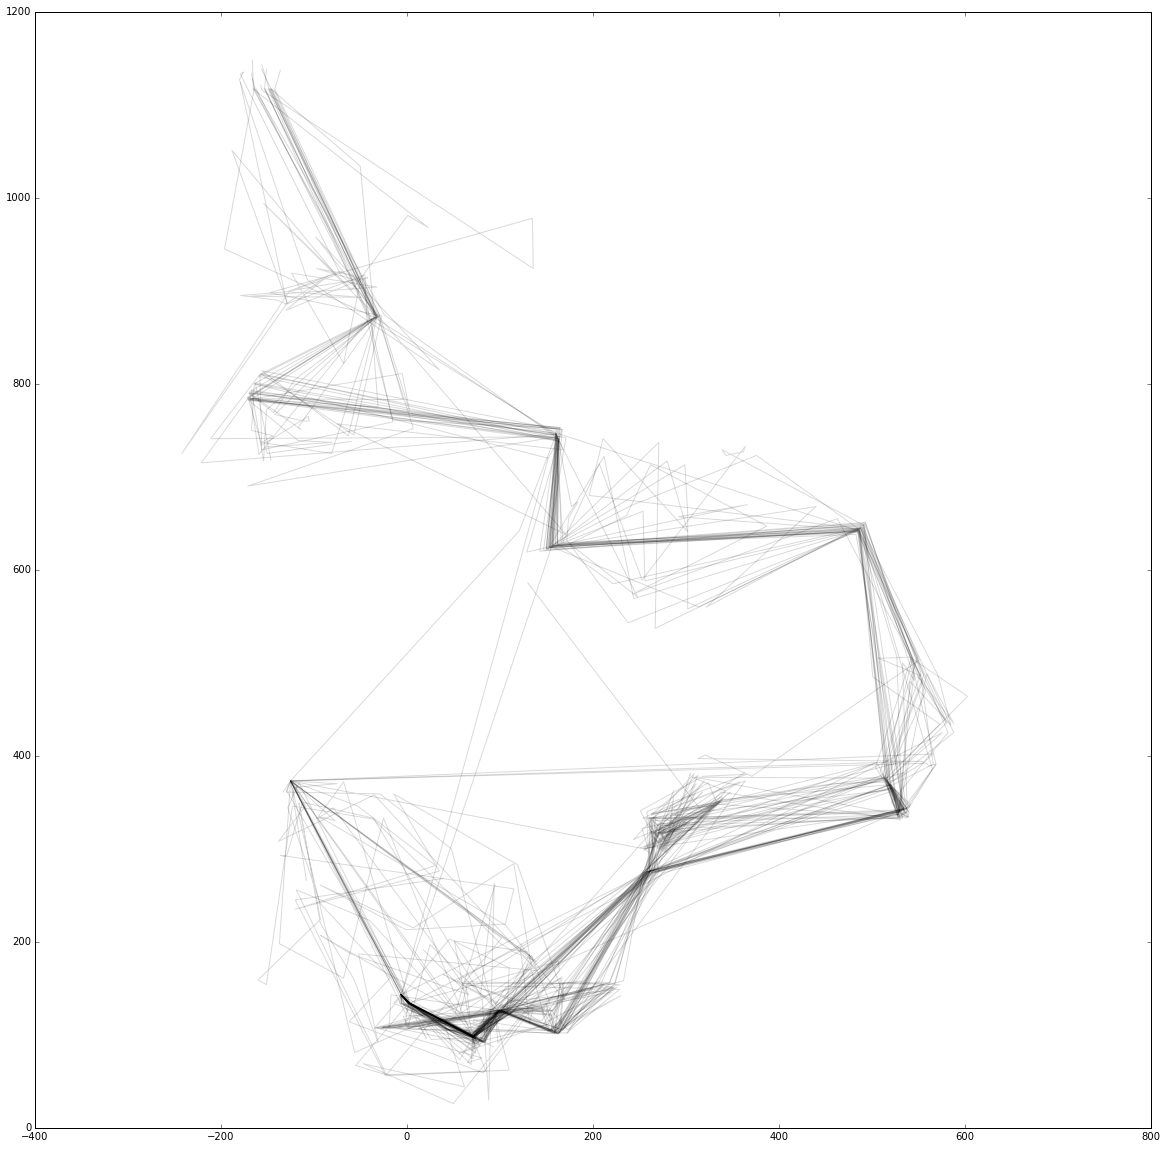

In [207]:
df = players_coordinates.loc[[ x for x in players_coordinates.index.unique() if len(players_coordinates.loc[x,:]) > 5],:]
df = df[ df["y"] < 1500 ]

players_list = list(df.index.unique())
plt.figure(figsize=(20,20))

for i, p in enumerate(players_list):
  select = df.loc[p,:]

  x = select["x"]
  y = select["y"]
  
  plt.plot(x,y, "-", c="black", alpha=0.15)

plt.axis('equal')
plt.show();

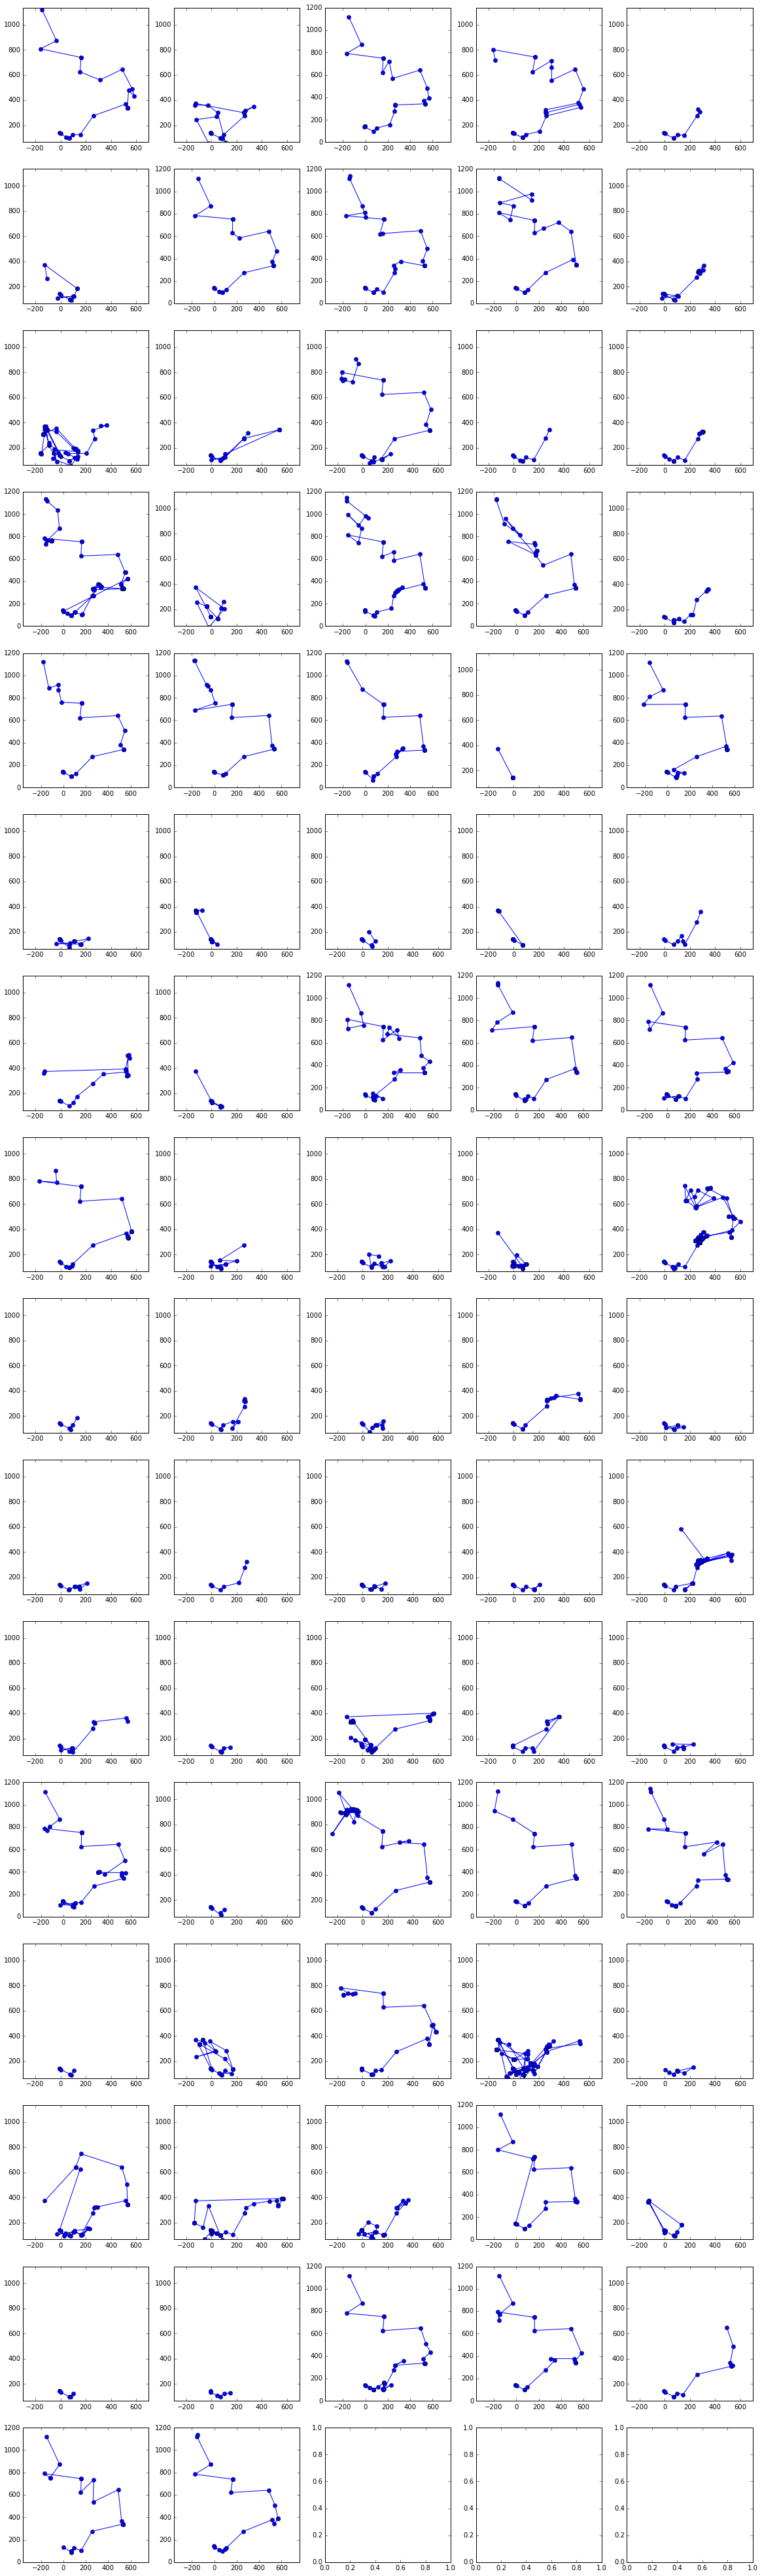

In [201]:
df = players_coordinates.loc[[ x for x in players_coordinates.index.unique() if len(players_coordinates.loc[x,:]) > 5],:]
df = df[ df["y"] < 1500 ]

players_list = list(df.index.unique())
plt.figure()

f, axarr = plt.subplots(len(players_list)/5+1, 5, figsize=(20,70))

for i, p in enumerate(players_list):
  select = df.loc[p,:]

  ax = axarr[i/5, i%5]

  x = select["x"]
  y = select["y"]
  
  ax.plot(x,y, "-o")
  ax.axis('equal')

  ax.set_xlim([-300, 700])
  ax.set_ylim([0, 1200])

plt.show();